# 1. Title: Associations Between Objective and Subjective Socioeconomic Status and Amyloid Beta Deposition

## 2. Background: 

Socioeconomic status (SES) is a complex and multifaceted construct that refers to an individuals’ social standing based on economic, educational, and/or occupational factors. Lower socioeconomic status (SES) has been found to associate with a variety of chronic health conditions and risk for developing Alzheimer’s disease (AD), a neurodogenerative condition that manifests as severve declines in cognitive function and behavioral alterations. However, whether SES is related to amyloid beta (Aβ) pathology, which has been implicated  as a factor involved in the pathogenesis of AD, among cognitively normal individuals remains unknown. Additionally, SES has been traditionally assessed using objective indices, such as income and education, but we have yet to determine how subjective SES, or one’s self-perception of social standing, may likewise relate to risk for AD. This study will address these gaps by examining the relationships of objective and subjective indices of SES with Aβ pathology. Findings from this study could give us more insight into which indicators of SES are linked to Aβ, which could elucidate SES related dispartities in AD and mechanistic pathways that contribute to these disparities.

## 3. Variables 

All variables used in the current study come from cross sectional data from Investigating Gains in Neurocognition in an Intervention Trial of Exercise (IGNITE) (Erickson et al., 2019) . IGNITE is a 12-month, randomized clinical trial exploring the effects of physical activity on brain and cognitive health in older adults. This trial has enrolled older adults between the ages of 65-80 years of age, without dementia, including AD, or mild cognitive impairment.  IGNITE is a multisite trial, with data collected in Pittsburgh, Kansas, and Boston; however, PET amyloid beta data was only collected in Pittsburgh and Kansas. 

Subject ID (Subject ID) (removed for confidentiality purposes)

Study Site (Study_Site): State in which participant is located/participanting in the study.

**Demographic Measures(collected through questionnaires):**

Age (Age): Participant's age (in years) at the time of joining the study.

**Socioeconomic Status Measures (collected through questionnaires):**

Annual Income (Pretax_continous): A continous measure (in US dollars) of how much a participant earned, before taxes and other deductions, during the past 12 months.

Years of Education (Education_continous): A continous measure (in years) of highest grade (or year) of regular school you have completed.

Subjective SES (UnitedStatesLadder): A continous measure of where participants would place themselves on the ladder at this point in their lives relative to other people in the US based on education, money, and occupation. 

**Amyloid Beta Measures (collected using PET Scans..processed using a script in Matlab):**

Global Amyloid Levels (Composite_SUVR_cerebellum): A continous measure of amyloid beta deposition across a participant's brains. Aβ deposition was quantified using the standardized reuptake value ratio (SUVR). This ratio quantifies the concentration of radioactive tracer at the time of the scan. SUVR takes into account an individuals’ body weight, the concentration of the injected dose, and controls for the uptake in a reference region when evaluating the uptake in a target region (Schwarz et al., 2017). The cerebellum was used as the reference region, since it is relatively free of Aβ (Klunk et al., 2004). To estimate global amyloid deposition, a composite SUVR index was calculated for each participant using the average SUVR from the: 1) anterior cingulate cortex (ACC), 2) posterior cingulate cortex (PCC), 3) frontal, 4) parietal, 5) temporal and 6) occipital regions.   

Amyloid Positivity (AB_Positivity): A dichotomous variable (0 = amyloid negative, 1 = amyloid positive) based on the Global Amyloid Beta Levels variable and an empiricially validated a priori cutoff of 1.10 (Cho et al., 2020) such that individuals with Global Amyloid Beta Levels (SUVR < 1.10) were considered amyloid negative (0), while individuals with levels (SUVR >1.10) were considered amyloid positive (1).

---
## **4. Aims and Hypotheses**

We aim to address the following questions in the current study: 

1) Do years of education relate to Aβ pathology?


2) Does annual income relate to Aβ pathology?


3) Does subjective SES relate to Aβ pathology?


We hypothesize that: 

1) Lower years of education will associate greater Aβ pathology.

$$
Y_{AmyloidLevels} = \beta_0 + \beta_1 X_{age} + \beta_2 X_{years of education} + \beta_3 X_{studysite}
$$
$$
Y_{AmyloidPositivity} = \beta_0 + \beta_1 X_{age} + \beta_2 X_{years of education} + \beta_3 X_{studysite}
$$

2) Lower annual income will associate with greater Aβ pathology. 
$$
Y_{AmyloidLevels} = \beta_0 + \beta_1 X_{age} + \beta_2 X_{annual income} + \beta_3 X_{studysite}
$$
$$
Y_{AmyloidPositivity} = \beta_0 + \beta_1 X_{age} + \beta_2 X_{annual income} + \beta_3 X_{studysite}
$$


3) Lower subjective will associate with greater Aβ pathology.
$$
Y_{AmyloidLevels} = \beta_0 + \beta_1 X_{age} + \beta_2 X_{subjective SES} + \beta_3 X_{studysite}
$$
$$
Y_{AmyloidPositivity} = \beta_0 + \beta_1 X_{age} + \beta_2 X_{subjective SES} + \beta_3 X_{studysite}
$$

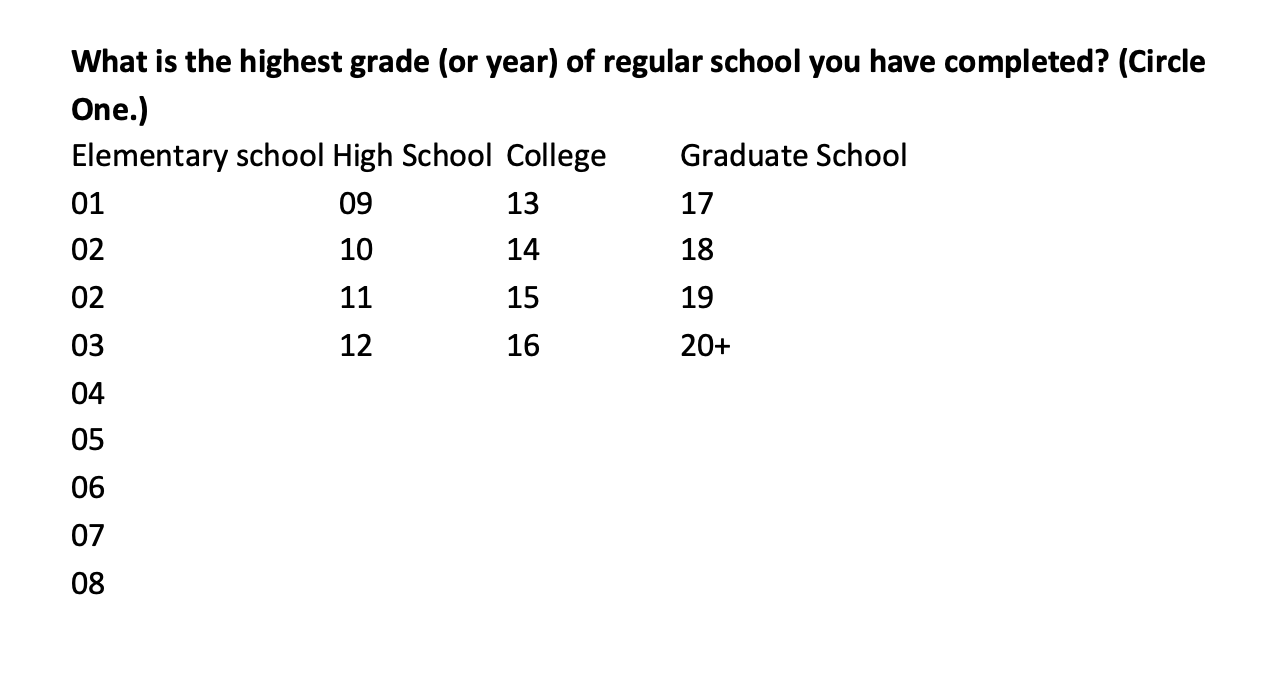
Figure 1: Question used to measure years of education.

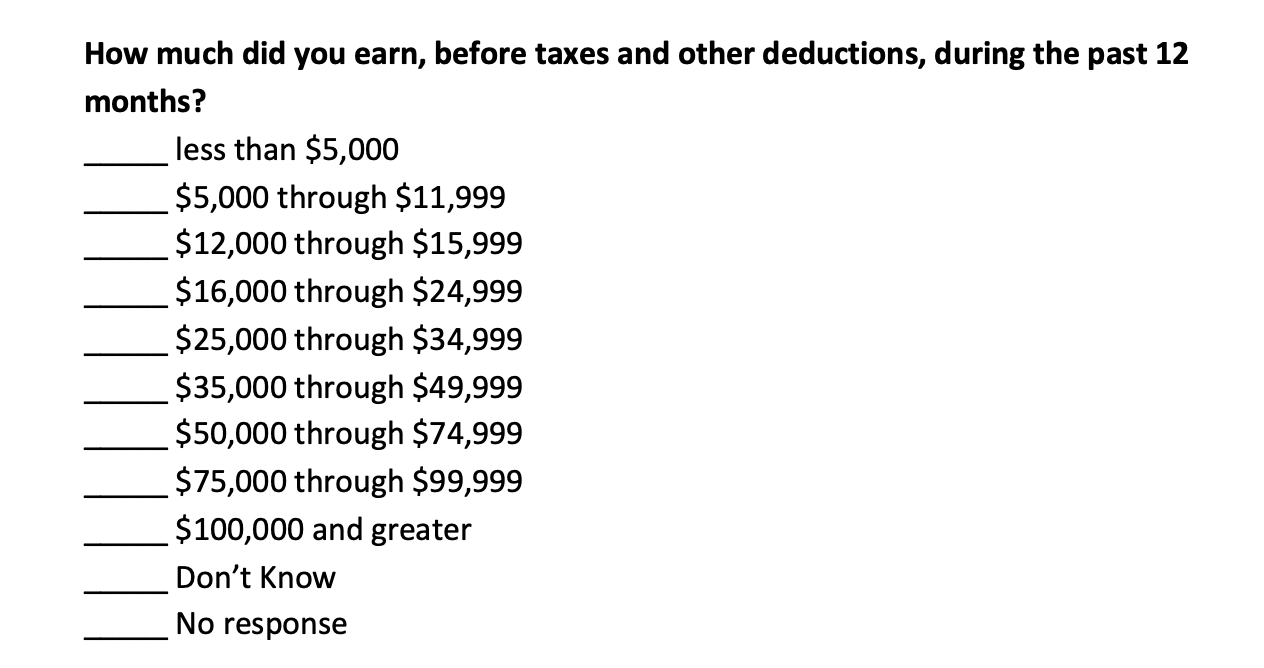
Figure 2: Question used to measure annual income.

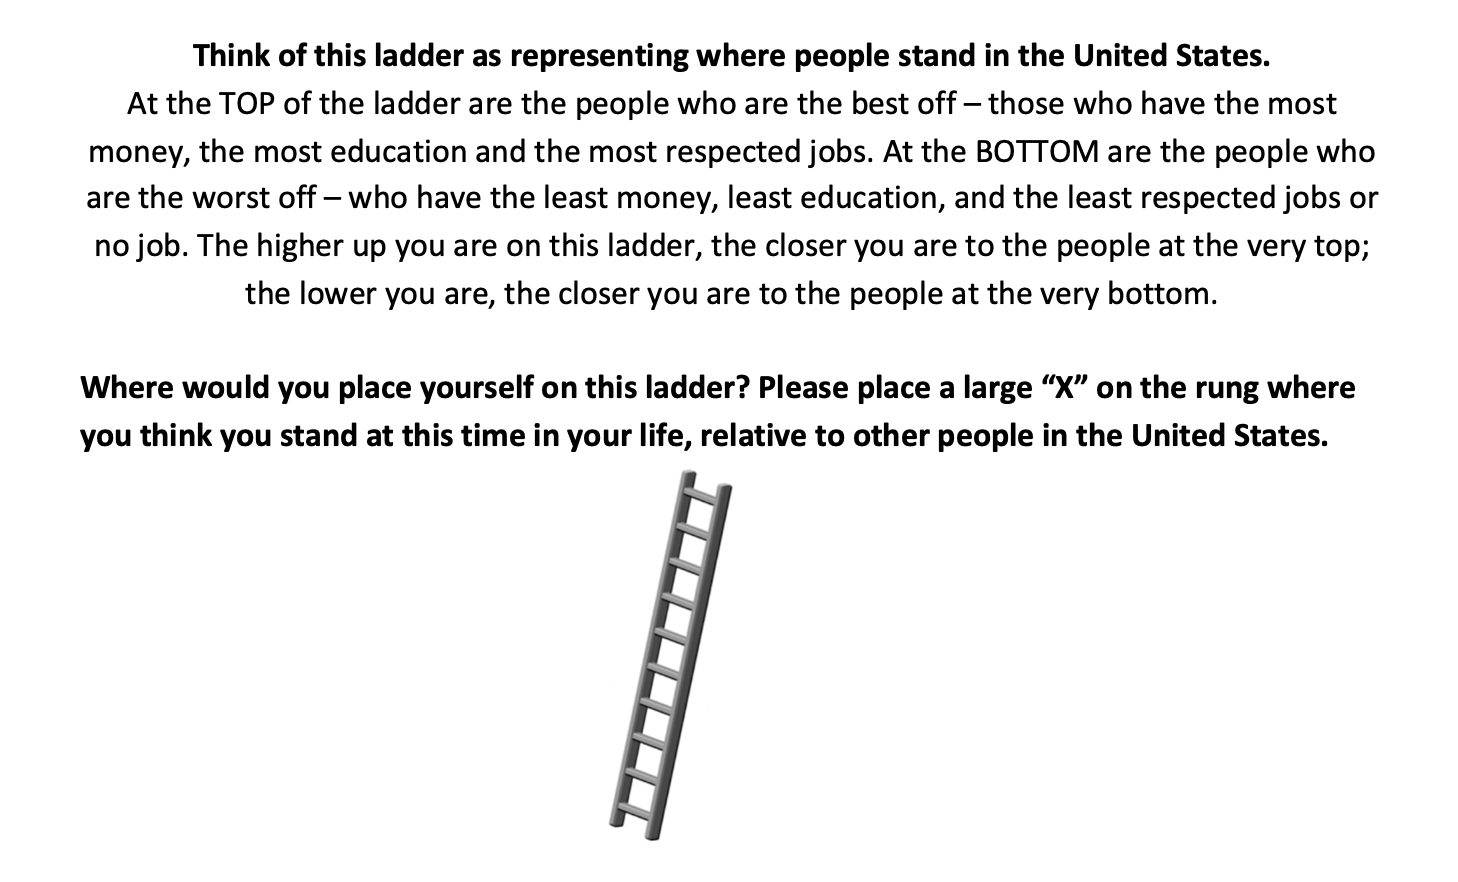
Figure 3: Question used to measure subjective SES.

---
## Statistical Plan

1. Linear regression models 
2. Linear mixed effect models with feature selection (AIC)
3. Logistic regression model 
4. Cross validation for the GLMs
5. Mediation analysis 

## 5. Data Organization - Prior to Data Manipulation/Cleaning In R

Annual income was converted to a continous variable in RedCap prior to data manipulation in R by using  
the midpoint each participants' designated income bracket as their continous measure of annual income.
The highest annual earning group was scaled to 25% above $100,000 for their continous measure of annual income based on a similar approached use by Gianaros, Marsland, Sheu, Erickson, & Verstynen (2013).

Years of education was also converted to a continous variable  in RedCap prior to data manipulation in R by 
using participants' designated education group as their continous measure of annual income. In the case of the 
20+ group, 20 years of education was used as their continous measure of years of education.


## 5. Data Organization


In [53]:
library("tidyverse")
library("dplyr")
library("readxl")

setwd("/Users/jermondrake/Documents")
FinalMasters <- read_csv("FinalMasters.csv")
head(FinalMasters)

Final <- FinalMasters   #making a copy of dataset to remove na's
na.omit(Final) -> Final #removing na's...na's were due to "don't know" or "no response" from participants on the 
                        #measure of annual income or amyloid PET data that has yet to be processed at the time of 
                        #these analyses
head(Final)
summary(Final)

Rows: 494 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Site
dbl (7): UnitedStatesLadder, Composite_SUVR_cerebellum, Age, Study_Site, Edu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


UnitedStatesLadder,Composite_SUVR_cerebellum,Age,Study_Site,Education_continous,AB_Positivity,Pretax_continous,Site
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
8,0.946828,71,1,20,0,20499.5,Pittsburgh
7,1.011044,67,1,17,0,62499.5,Pittsburgh
7,1.062393,72,1,18,0,29999.5,Pittsburgh
5,0.899153,65,1,19,0,125000.0,Pittsburgh
8,0.976209,70,1,16,0,29999.5,Pittsburgh
8,0.923950,76,1,17,0,62499.5,Pittsburgh


UnitedStatesLadder,Composite_SUVR_cerebellum,Age,Study_Site,Education_continous,AB_Positivity,Pretax_continous,Site
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
8,0.946828,71,1,20,0,20499.5,Pittsburgh
7,1.011044,67,1,17,0,62499.5,Pittsburgh
7,1.062393,72,1,18,0,29999.5,Pittsburgh
5,0.899153,65,1,19,0,125000.0,Pittsburgh
8,0.976209,70,1,16,0,29999.5,Pittsburgh
8,0.923950,76,1,17,0,62499.5,Pittsburgh


 UnitedStatesLadder Composite_SUVR_cerebellum      Age          Study_Site   
 Min.   : 1.000     Min.   :0.8493            Min.   :65.00   Min.   :1.000  
 1st Qu.: 5.000     1st Qu.:0.9675            1st Qu.:66.00   1st Qu.:1.000  
 Median : 6.000     Median :1.0084            Median :69.00   Median :1.000  
 Mean   : 6.185     Mean   :1.0573            Mean   :69.36   Mean   :1.497  
 3rd Qu.: 7.000     3rd Qu.:1.0686            3rd Qu.:72.00   3rd Qu.:2.000  
 Max.   :10.000     Max.   :1.6979            Max.   :80.00   Max.   :2.000  
 Education_continous AB_Positivity    Pretax_continous     Site          
 Min.   : 9.00       Min.   :0.0000   Min.   :  2500   Length:298        
 1st Qu.:16.00       1st Qu.:0.0000   1st Qu.: 20500   Class :character  
 Median :16.00       Median :0.0000   Median : 42500   Mode  :character  
 Mean   :16.61       Mean   :0.2047   Mean   : 47320                     
 3rd Qu.:18.00       3rd Qu.:0.0000   3rd Qu.: 62500                     
 Max.   :2

---
## 6. Analysis - Linear Regression 



Call:
glm(formula = Composite_SUVR_cerebellum ~ Age + Pretax_continous + 
    Site, data = Final)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.21650  -0.09341  -0.04387   0.01762   0.63507  

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)       5.573e-01  1.791e-01   3.112  0.00204 **
Age               7.877e-03  2.571e-03   3.064  0.00238 **
Pretax_continous -6.054e-07  2.576e-07  -2.351  0.01940 * 
SitePittsburgh   -3.518e-02  1.858e-02  -1.893  0.05934 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.02499934)

    Null deviance: 7.7784  on 297  degrees of freedom
Residual deviance: 7.3498  on 294  degrees of freedom
AIC: -247.63

Number of Fisher Scoring iterations: 2


`geom_smooth()` using formula 'y ~ x'




Call:
glm(formula = Composite_SUVR_cerebellum ~ Age + Education_continous + 
    Site, data = Final)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.23892  -0.08913  -0.04543   0.01697   0.63138  

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)          0.563116   0.186421   3.021  0.00274 **
Age                  0.008230   0.002598   3.168  0.00170 **
Education_continous -0.003741   0.003859  -0.969  0.33314   
SitePittsburgh      -0.028807   0.018500  -1.557  0.12051   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.02538807)

    Null deviance: 7.7784  on 297  degrees of freedom
Residual deviance: 7.4641  on 294  degrees of freedom
AIC: -243.04

Number of Fisher Scoring iterations: 2


`geom_smooth()` using formula 'y ~ x'



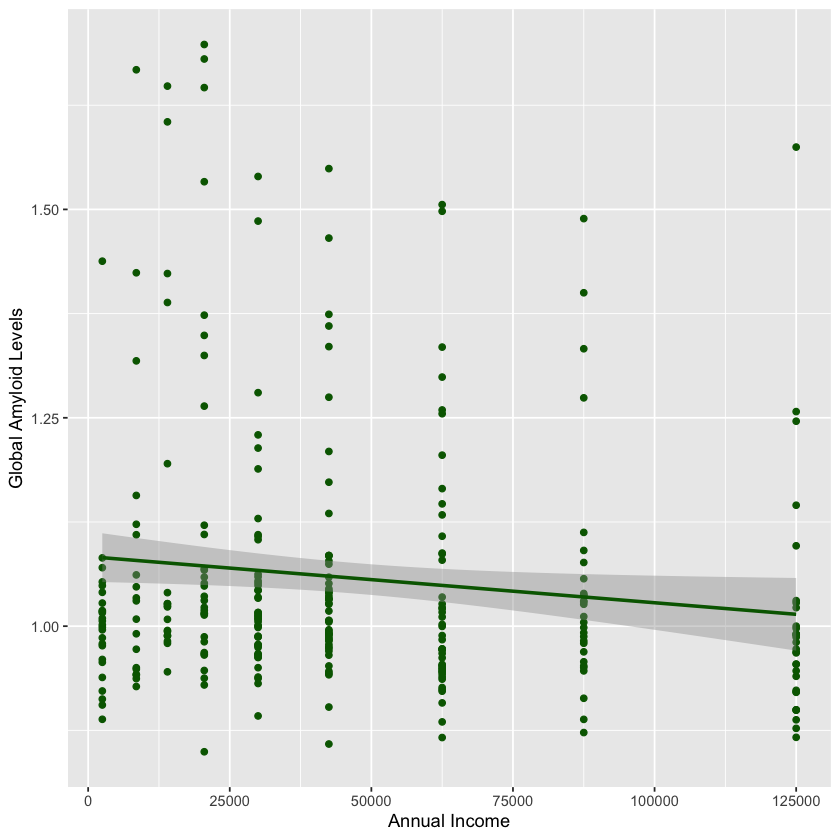


Call:
glm(formula = Composite_SUVR_cerebellum ~ Age + UnitedStatesLadder + 
    Site, data = Final)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.23037  -0.08939  -0.04339   0.02482   0.66190  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)         0.570741   0.179552   3.179  0.00164 **
Age                 0.008456   0.002574   3.285  0.00114 **
UnitedStatesLadder -0.013490   0.005547  -2.432  0.01561 * 
SitePittsburgh     -0.032758   0.018430  -1.777  0.07654 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.02496691)

    Null deviance: 7.7784  on 297  degrees of freedom
Residual deviance: 7.3403  on 294  degrees of freedom
AIC: -248.02

Number of Fisher Scoring iterations: 2


`geom_smooth()` using formula 'y ~ x'



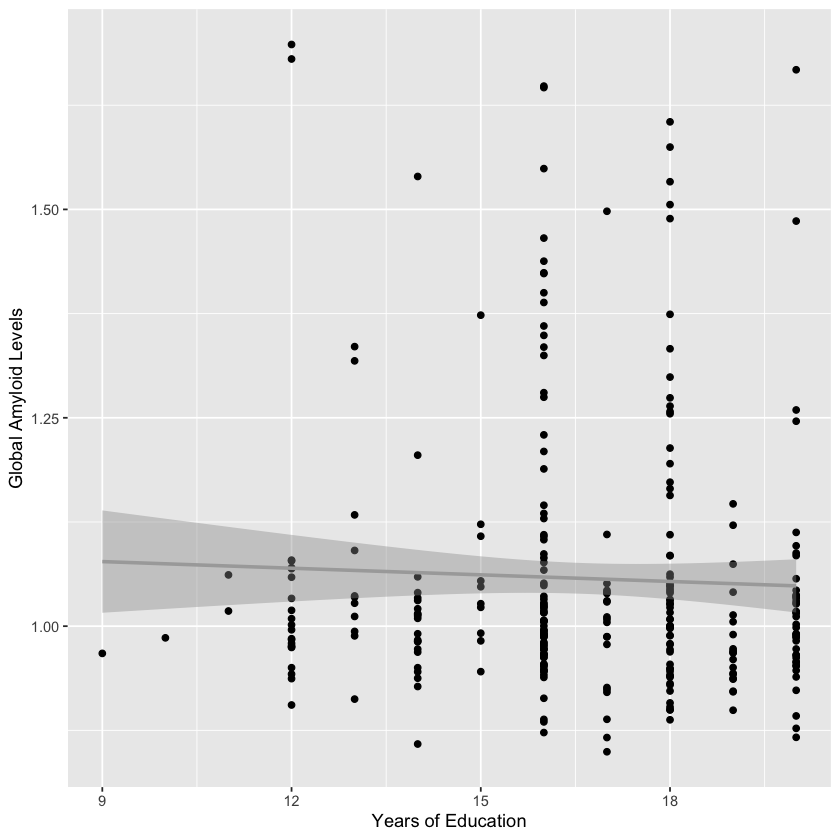

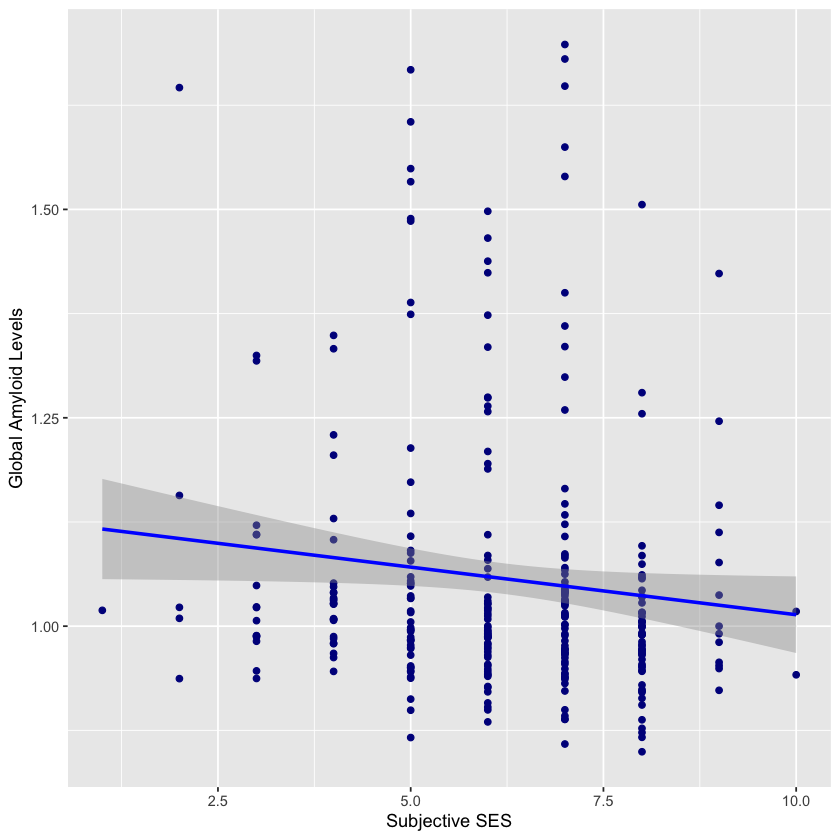

In [51]:
glm.fit = glm(Composite_SUVR_cerebellum~Age + Pretax_continous + Site, data=Final)
summary(glm.fit)

ggplot(Final, aes(x=Pretax_continous, y=Composite_SUVR_cerebellum)) +
  geom_point(color="dark green") +
  geom_smooth(method=lm, se=TRUE, color="dark green") +
  scale_x_continuous(name = "Annual Income" ) +
  scale_y_continuous(name = "Global Amyloid Levels")


glm.fit2 = glm(Composite_SUVR_cerebellum~Age + Education_continous  + Site, data=Final)
summary(glm.fit2)

ggplot(Final, aes(x=Education_continous, y=Composite_SUVR_cerebellum)) +
  geom_point() +
  geom_smooth(method=lm, se=TRUE, color="dark gray") +
  scale_x_continuous(name = "Years of Education" ) +
  scale_y_continuous(name = "Global Amyloid Levels")


glm.fit3 = glm(Composite_SUVR_cerebellum~Age + UnitedStatesLadder + Site, data=Final)
summary(glm.fit3) 

ggplot(Final, aes(x=UnitedStatesLadder, y=Composite_SUVR_cerebellum)) +
  geom_point(color="dark blue") +
  geom_smooth(method=lm, se=TRUE, color="blue") +
  scale_x_continuous(name = "Subjective SES" ) +
  scale_y_continuous(name = "Global Amyloid Levels")

---
## 6. Analysis -  Linear Regression Interpretation

The results above suggest that annual income (pretax_continous), and subjective SES (UnitedStatesLadder) are negatively associated with global amyloid levels (ps < .05). However, years of education (Education continous) does not appear to associate with global amyloid levels (p >.05). Interestingly, the models also suggest that there is a significant diffence in amyloid levels between study sites. 

---
## 6. Analysis - Linear Mixed-Effects Models
While including study site in the models above may control for the mean difference in global amyloid levels between study sites, considering linear mixed effect models may be optimum to account for the effect of site on slope. As such, for the next set of analyses, we will conduct linear mixed effect models to potentially better control for nesting of the data.

In [54]:
library(lme4)

me.fit1 = lmer(Composite_SUVR_cerebellum ~ Age + Pretax_continous + (1 | Site), data=Final) # subject intercepts and slopes
summary(me.fit1)

me.fit2 = lmer(Composite_SUVR_cerebellum ~ Age + Pretax_continous + (Age | Site) + (Pretax_continous | Site), data=Final)
summary(me.fit2)

ic = AIC(glm.fit, me.fit1, me.fit2)
ic
diff(ic$AIC)


me.fit3 = lmer(Composite_SUVR_cerebellum ~ Age + Education_continous + (1 | Site), data=Final) # subject intercepts and slopes
summary(me.fit3)

me.fit4 = lmer(Composite_SUVR_cerebellum ~ Age + Education_continous + (Age | Site) + (Pretax_continous | Site), data=Final)
summary(me.fit4)

ic2 = AIC(glm.fit2, me.fit3, me.fit4)
ic2
diff(ic2$AIC)


me.fit5 = lmer(Composite_SUVR_cerebellum ~ Age + UnitedStatesLadder + (1 | Site), data=Final) # subject intercepts and slopes
summary(me.fit5)

me.fit6 = lmer(Composite_SUVR_cerebellum ~ Age + UnitedStatesLadder + (Age | Site) + (Pretax_continous | Site), data=Final)
summary(me.fit6)


ic3 = AIC(glm.fit3, me.fit5, me.fit6)
ic3
diff(ic3$AIC)

Warning message:
“Some predictor variables are on very different scales: consider rescaling”


Linear mixed model fit by REML ['lmerMod']
Formula: Composite_SUVR_cerebellum ~ Age + Pretax_continous + (1 | Site)
   Data: Final

REML criterion at convergence: -209.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3376 -0.5779 -0.2760  0.1064  3.9888 

Random effects:
 Groups   Name        Variance Std.Dev.
 Site     (Intercept) 0.000446 0.02112 
 Residual             0.024999 0.15811 
Number of obs: 298, groups:  Site, 2

Fixed effects:
                   Estimate Std. Error t value
(Intercept)       5.437e-01  1.798e-01   3.024
Age               7.804e-03  2.570e-03   3.037
Pretax_continous -5.840e-07  2.567e-07  -2.275

Correlation of Fixed Effects:
            (Intr) Age   
Age         -0.993       
Pretx_cntns -0.095  0.028
fit warnings:
Some predictor variables are on very different scales: consider rescaling

Warning message:
“Some predictor variables are on very different scales: consider rescaling”
boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: Composite_SUVR_cerebellum ~ Age + Pretax_continous + (Age | Site) +  
    (Pretax_continous | Site)
   Data: Final

REML criterion at convergence: -200.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3622 -0.5775 -0.2706  0.1404  4.0121 

Random effects:
 Groups   Name             Variance  Std.Dev.  Corr 
 Site     (Intercept)      2.433e-02 1.560e-01      
          Age              2.130e-03 4.615e-02 -0.02
 Site.1   (Intercept)      2.433e-02 1.560e-01      
          Pretax_continous 3.096e-13 5.564e-07 1.00 
 Residual                  2.481e-02 1.575e-01      
Number of obs: 298, groups:  Site, 2

Fixed effects:
                   Estimate Std. Error t value
(Intercept)       5.416e-01  2.371e-01   2.284
Age               7.851e-03  3.274e-02   0.240
Pretax_continous -6.371e-07  4.711e-07  -1.352

Correlation of Fixed Effects:
            (Intr) Age   
Age         -0.068       
Pretx_cntns  0.349  0.001
fit war

,df,AIC
,<dbl>,<dbl>
glm.fit,5,-247.6337
me.fit1,5,-199.1574
me.fit2,10,-180.0815


[1] 48.47629 19.07587

Linear mixed model fit by REML ['lmerMod']
Formula: Composite_SUVR_cerebellum ~ Age + Education_continous + (1 |  
    Site)
   Data: Final

REML criterion at convergence: -224.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4599 -0.5748 -0.2900  0.1139  3.9267 

Random effects:
 Groups   Name        Variance  Std.Dev.
 Site     (Intercept) 0.0002438 0.01561 
 Residual             0.0253881 0.15934 
Number of obs: 298, groups:  Site, 2

Fixed effects:
                     Estimate Std. Error t value
(Intercept)          0.554502   0.186875   2.967
Age                  0.008129   0.002596   3.132
Education_continous -0.003669   0.003858  -0.951

Correlation of Fixed Effects:
            (Intr) Age   
Age         -0.937       
Edctn_cntns -0.267 -0.078

boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: Composite_SUVR_cerebellum ~ Age + Education_continous + (Age |  
    Site) + (Pretax_continous | Site)
   Data: Final

REML criterion at convergence: -215.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3837 -0.5634 -0.2707  0.0990  3.9858 

Random effects:
 Groups   Name             Variance  Std.Dev.  Corr 
 Site     (Intercept)      2.448e-02 1.565e-01      
          Age              2.154e-03 4.641e-02 -0.02
 Site.1   (Intercept)      2.448e-02 1.565e-01      
          Pretax_continous 1.697e-13 4.119e-07 -1.00
 Residual                  2.506e-02 1.583e-01      
Number of obs: 298, groups:  Site, 2

Fixed effects:
                     Estimate Std. Error t value
(Intercept)          0.431527   0.228065   1.892
Age                  0.008082   0.032920   0.246
Education_continous -0.002355   0.003932  -0.599

Correlation of Fixed Effects:
            (Intr) Age   
Age         -0.069       
Edctn_cntns -0.282 -0.

,df,AIC
,<dbl>,<dbl>
glm.fit2,5,-243.0355
me.fit3,5,-214.2342
me.fit4,10,-195.8971


[1] 28.80129 18.33717

Linear mixed model fit by REML ['lmerMod']
Formula: Composite_SUVR_cerebellum ~ Age + UnitedStatesLadder + (1 | Site)
   Data: Final

REML criterion at convergence: -229.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4251 -0.5711 -0.2796  0.1423  4.1540 

Random effects:
 Groups   Name        Variance  Std.Dev.
 Site     (Intercept) 0.0003667 0.01915 
 Residual             0.0249669 0.15801 
Number of obs: 298, groups:  Site, 2

Fixed effects:
                    Estimate Std. Error t value
(Intercept)         0.558921   0.180183   3.102
Age                 0.008362   0.002572   3.251
UnitedStatesLadder -0.013179   0.005538  -2.380

Correlation of Fixed Effects:
            (Intr) Age   
Age         -0.978       
UntdSttsLdd -0.125 -0.066

boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: Composite_SUVR_cerebellum ~ Age + UnitedStatesLadder + (Age |  
    Site) + (Pretax_continous | Site)
   Data: Final

REML criterion at convergence: -220.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3540 -0.5682 -0.2773  0.1345  4.1892 

Random effects:
 Groups   Name             Variance  Std.Dev.  Corr 
 Site     (Intercept)      2.413e-02 1.553e-01      
          Age              2.136e-03 4.622e-02 -0.01
 Site.1   (Intercept)      2.413e-02 1.553e-01      
          Pretax_continous 6.967e-14 2.639e-07 -1.00
 Residual                  2.477e-02 1.574e-01      
Number of obs: 298, groups:  Site, 2

Fixed effects:
                    Estimate Std. Error t value
(Intercept)         0.470893   0.226198   2.082
Age                 0.008412   0.032782   0.257
UnitedStatesLadder -0.012513   0.005609  -2.231

Correlation of Fixed Effects:
            (Intr) Age   
Age         -0.067       
UntdSttsLdd -0.159 -0.006
o

,df,AIC
,<dbl>,<dbl>
glm.fit3,5,-248.0205
me.fit5,5,-219.6377
me.fit6,10,-200.7805


[1] 28.38280 18.85722

---
## 6. Analysis - Linear Mixed-Effects Model Interpretation

glm.fit, glm.fit2, and glm.fit2, which corresponds to seperate linear regression models that use annual income, years of education, and subjective SES as independent variables in models predicting global amyloid levels respectively were found to have a lower Akaike information criterion (AIC) compared to mixed effect models which accounted for random intercepts and random slopes related to study site. The simple linear regression models having lower AICs suggest that incorporating additional complexity in our models by using linear mixed effect models may not be worthwhile.

## 6. Analysis - Logistic Regression

While using using amyloid beta as a continous measure may give us greater power and allow us to better characterize SES related disparities in amyloid pathology that may exist even among those who do not meet criteria for amyloid positivity, it is worth acknowledging that amyloid positivity is often used as an outcome variable in the literature and in clinical settings. In order to speak to this literature and determine the robustness of our findings, we will replicate our linear regression models using logistic regression models with amyloid positivity as the outcome variable.

In [49]:
log.fit=glm(AB_Positivity~Age + Pretax_continous + Site, data=Final, family=binomial) 
summary (log.fit)

log.fit2 = glm(AB_Positivity~Age + Education_continous + Site, data=Final, family=binomial)
summary (log.fit2)

log.fit3 = glm(AB_Positivity~Age + UnitedStatesLadder + Site, data=Final, family=binomial)
summary (log.fit3)


Call:
glm(formula = AB_Positivity ~ Age + Pretax_continous + Site, 
    family = binomial, data = Final)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3117  -0.7344  -0.5904  -0.4352   2.1527  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)      -7.351e+00  2.907e+00  -2.528   0.0115 *
Age               9.595e-02  4.156e-02   2.309   0.0210 *
Pretax_continous -6.136e-06  4.418e-06  -1.389   0.1649  
SitePittsburgh   -7.546e-01  3.220e-01  -2.344   0.0191 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 266.40  on 255  degrees of freedom
Residual deviance: 254.87  on 252  degrees of freedom
AIC: 262.87

Number of Fisher Scoring iterations: 4



Call:
glm(formula = AB_Positivity ~ Age + Education_continous + Site, 
    family = binomial, data = Final)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1735  -0.7179  -0.6139  -0.4786   2.0708  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)  
(Intercept)         -7.744269   3.048059  -2.541   0.0111 *
Age                  0.095194   0.041324   2.304   0.0212 *
Education_continous  0.007474   0.066860   0.112   0.9110  
SitePittsburgh      -0.677666   0.316078  -2.144   0.0320 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 266.40  on 255  degrees of freedom
Residual deviance: 256.87  on 252  degrees of freedom
AIC: 264.87

Number of Fisher Scoring iterations: 4



Call:
glm(formula = AB_Positivity ~ Age + UnitedStatesLadder + Site, 
    family = binomial, data = Final)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2208  -0.7304  -0.5709  -0.3987   2.4002  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)   
(Intercept)        -6.48008    2.91541  -2.223  0.02624 * 
Age                 0.10288    0.04166   2.470  0.01352 * 
UnitedStatesLadder -0.26806    0.09772  -2.743  0.00609 **
SitePittsburgh     -0.82322    0.32923  -2.500  0.01240 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 266.40  on 255  degrees of freedom
Residual deviance: 249.15  on 252  degrees of freedom
AIC: 257.15

Number of Fisher Scoring iterations: 4


## 6. Analysis - Logistic Regression Interpretation

Subjective SES (UnitedStatesLadder), but not years of education (Education_continous) nor annual income (Pretax_continous), were found to associate with amyloid positivity.

---
## 6. Analysis - Cross Validation 

Leave one out cross validation (LOOCV) was used to assess the predictive performance of the linear models and evaluate their generalizability.

Cross validation values depend on the scale of the outcome variable..there is no cutoff to designate whether you can say your models generalize or not, rather, error is considered small or large in reference to the variable you are trying to predict.

In [55]:
library(boot)

cv.err = cv.glm(Final, glm.fit, K=nrow(Final))
cv.err$delta 

cv.err2 = cv.glm(Final, glm.fit2, K=nrow(Final))
cv.err2$delta 

cv.err3 = cv.glm(Final, glm.fit3, K=nrow(Final))
cv.err3$delta 

[1] 0.02540804 0.02540678

[1] 0.02582110 0.02581979

[1] 0.02536720 0.02536595

---
## 6. Analysis - Cross Validation Interpretation

cv.err$delta is the raw cross-validation estimate of prediction error (equation above)
  and the second is the adjusted cross-validation estimate designed to 
  compensate for the bias introduced by not using leave-one-out cross-validation
  
The test error derived from the linear regression models are 0.025-0.026, suggesting that the models generalize to other observations.

---
## 6. Analysis - Post Hoc Mediation 

Previous analyses (not addressed in the current project) demonstrated that including subjective SES (UnitedStatesLadder) and annual income (Pretax_continous) together in a single linear regression model attenuates the relationships observed between subjective SES and annual income with global amyloid levels. These findings raised the questions regarding the extent to which one's subective SES may be mediating the relationship between annual income and global amyloid levels. While it is difficult to make causal claims from mediation analyses using cross sectional data, out of curiosity, we conducted a post hoc mediation analysis below. 

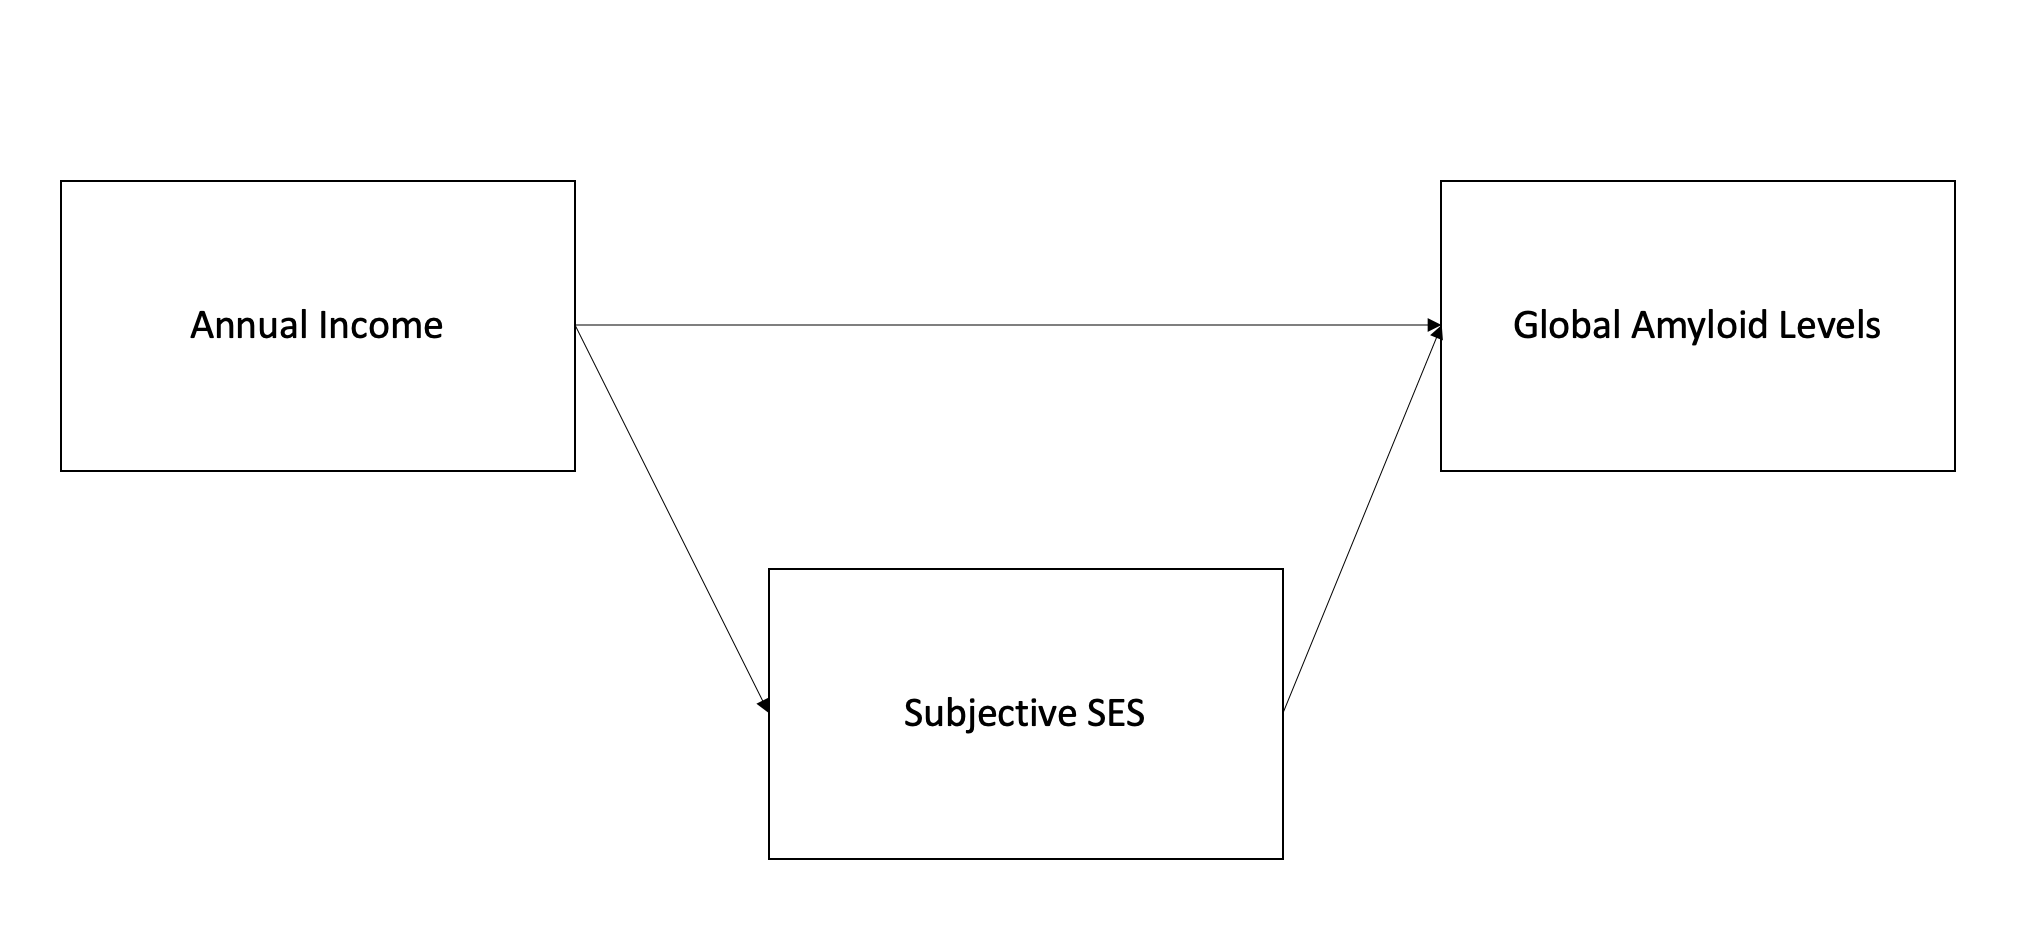 
Figure 4: Hypothesized mediation model whereby subjective SES mediates the relationship between annual income and global amyloid levels

In [48]:
library("mediation")
library("MASS")

fitM <- lm(Pretax_continous ~ UnitedStatesLadder, data=Final) 
fitY <- lm(Composite_SUVR_cerebellum ~ UnitedStatesLadder + Pretax_continous, data=Final) 
summary(fitM)
summary(fitY)
fitMed <- mediate(fitM, fitY, treat="Pretax_continous", mediator="UnitedStatesLadder")
summary(fitMed)


Call:
lm(formula = Pretax_continous ~ UnitedStatesLadder, data = Final)

Residuals:
   Min     1Q Median     3Q    Max 
-71858 -24154  -4574  15542  84748 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)            6146       8582   0.716    0.475    
UnitedStatesLadder     6821       1343   5.079 7.37e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35500 on 254 degrees of freedom
Multiple R-squared:  0.09218,	Adjusted R-squared:  0.08861 
F-statistic: 25.79 on 1 and 254 DF,  p-value: 7.367e-07



Call:
lm(formula = Composite_SUVR_cerebellum ~ UnitedStatesLadder + 
    Pretax_continous, data = Final)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19968 -0.09279 -0.05212  0.01282  0.61678 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.145e+00  3.905e-02  29.336   <2e-16 ***
UnitedStatesLadder -1.039e-02  6.408e-03  -1.622    0.106    
Pretax_continous   -4.381e-07  2.852e-07  -1.536    0.126    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1613 on 253 degrees of freedom
Multiple R-squared:  0.02754,	Adjusted R-squared:  0.01985 
F-statistic: 3.582 on 2 and 253 DF,  p-value: 0.02923



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

                Estimate 95% CI Lower 95% CI Upper p-value
ACME            0.00e+00     0.00e+00            0    1.00
ADE            -4.51e-07    -9.97e-07            0    0.11
Total Effect   -4.51e-07    -9.97e-07            0    0.11
Prop. Mediated  0.00e+00     0.00e+00            0    1.00

Sample Size Used: 256 


Simulations: 1000 


---
## 6. Analysis - Post Hoc Mediation Interpretation

While there is a relationship between subjective SES and annual income, and the "effect" of annual income on global amyloid levels go away when controlling for subjective SES, there does not appear to be a statistically significant mediation effect (ACME p > .05) - we would not expect amyloid levels to change if we varied subjective SES, but held annual income constant. Other effects were also non significant in the mediation model. We could consider running a power analysis to determine whether we are sufficiently powered to detect an effect if one is present; however, for brevity of the project we will simply speculate that we may be underpowered or that there is some other confounding varible that we do not have in our models which may explain the relationships between subjective SES and annual income with global amyloid levels...perhaps diet quality, engagement in physical activity, depression, and/or stress?)

## 7. Conclusions

As previously mentioned, the current study sought to determine the relationship between subjective and objective indicies of SES with amyloid beta pathology, as determined by global amyloid levels and amyloid positivity. We hypothesized that measures of objective and subjetive SES would associate with greater levels of amyloid and amyloid positivity. 

The results of the current study are partially in support of our hypotheses. Consistent with the hypotheses, we found that annual income, and subjective SES were inversely associated with amyloid levels such that those with who were lower on these indices of SES had greater levels of amyloid. Additionally, the test error derived from LOCV suggest that these models may be generalizable/predict amyloid levels better than chance. We also found that subjective SES associated with the likelihood of meeting criteria for amyloid positivity. Contrary to the hypotheses, we found that years of education was not associated with amyloid levels nor amyloid positivity. Also, while annual income was associated with levels of amyloid, it was not associated with amyloid positivity. Finally, while subjective SES and annual income are associated with eachother and attenuate eachother's relationship with global amyloid levels when including them together in a single linear regression model, subjective SES does not appear to mediate the relationship between annual income and global amyloid levels. 

While the present study has several limitations (i.e. use of cross sectional data which makes it difficult to make causaul claims regarding the relationship between indicies of SES and amyloid pathology), the finding of the current study may serve as a first step to eventually help explain disparities in AD diagnosis attributable to educational, income, and social inequalities. 

## References

Cho, S. H., Choe, Y. S., Kim, Y. J., Lee, B., Kim, H. J., Jang, H., Kim, J. P., Jung, Y. H., Kim, S. J., Kim, B. C., Farrar, G., Na, D. L., Moon, S. H., & Seo, S. W. (2020). Concordance in detecting amyloid positivity between 18F-florbetaben and 18F-flutemetamol amyloid PET using quantitative and qualitative assessments. Scientific reports, 10(1), 19576. 

Erickson, K. I., Grove, G. A., Burns, J. M., Hillman, C. H., Kramer, A. F., McAuley, E., Vidoni, E. D., Becker, J. T., Butters, M. A., Gray, K., Huang, H., Jakicic, J. M., Kamboh, M. I., Kang, C., Klunk, W. E., Lee, P., Marsland, A. L., Mettenburg, J., Rogers, R. J., Stillman, C. M., … Wollam, M. E. (2019). Investigating Gains in Neurocognition in an Intervention Trial of Exercise (IGNITE): Protocol. Contemporary clinical trials, 85, 105832. 

Gianaros, P. J., Marsland, A. L., Sheu, L. K., Erickson, K. I., & Verstynen, T. D. (2013). 	Inflammatory pathways link socioeconomic inequalities to white matter architecture. Cerebral cortex (New York, N.Y. : 1991), 23(9), 2058–2071. 

Klunk, W. E., Engler, H., Nordberg, A., Wang, Y., Blomqvist, G., Holt, D. P., Bergström, M., 	Savitcheva, I., Huang, G. F., Estrada, S., Ausén, B., Debnath, M. L., Barletta, J., Price, J. 	C., Sandell, J., Lopresti, B. J., Wall, A., Koivisto, P., Antoni, G., Mathis, C. A., … 	Långström, B. (2004). Imaging brain amyloid in Alzheimer's disease with Pittsburgh 	Compound-B. Annals of neurology, 55(3), 306–319. 

Schwarz, C. G., Senjem, M. L., Gunter, J. L., Tosakulwong, N., Weigand, S. D., Kemp, B. J., 	Spychalla, A. J., Vemuri, P., Petersen, R. C., Lowe, V. J., & Jack, C. R., Jr (2017). 	Optimizing PiB-PET SUVR change-over-time measurement by a large-scale analysis of 	longitudinal reliability, plausibility, separability, and correlation with 	MMSE. NeuroImage, 144(Pt A), 113–127. 